In [1]:
import os
import sys
import glob
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt
import astropy.io.fits   as fits
import matplotlib.pyplot as plt
import numpy             as np
import matplotlib.ticker as mticker

from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   astropy.table           import Table, vstack

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
import pubplot

from   gama_limits   import gama_field
from   delta8_limits import delta8_tier
from   cartesian     import rotate

In [4]:
field = 'G9'

In [5]:
gama_d8 = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp_n8.fits')
gama_d8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],DDPMALL_0P0_VISZ,RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64
622826,588848900966843153,135.29128973,0.73684492,19.52932,0.19599,4,G09_Y4_250_046,5,22.020153,20.377008,19.499466,19.005283,18.786238,675.6378214236531,39.148569764410766,G9,-401.4507325397739,397.38942226883273,7.264870993114358,398.1057165460414,-400.7474548163634,6.865700983452657,0.8775425,0.6789683728789483,0,4,-0.029020090728582998,0.1695540321200077,0.19292944833848633,0.462867137624522,0.6076048064415034,2.12,-0.1901103,-0.41549876,-19.622069153554687,-19.396680686242828,39.151388916738284,38.926000449426425,-0.047026403497541024,0.13382084983997683,0.16969847486466008,0.3989961395536401,-19.59883818008086,0.27067947,0.22221714400534023,0.0,-7.52932,0.006325233218597454,0.0,0 .. 0,-19.32744887922262,0.35703788435858874,3119308,21.549450341050868,1.0,26,0,0,1.0328129114025528,-1.0,-1.0
98018,587722984422572189,175.80676776,1.03979445,17.181564,0.12235,5,318751477415831552,6,20.014534,18.041721,17.051146,16.660717,16.285437,401.92205472701687,38.020709189748985,G12,-357.0901766741274,26.18065690719771,6.498521489182441,356.8640071382125,-29.17917108743816,6.140703437324076,0.9905758,0.9322315941078698,0,6,-0.07415675158056104,-0.01581255528315742,0.1523203042708887,0.3703209668941504,0.7725751277820118,0.8,-0.1186795,-0.09788,-20.87278566184891,-20.893585164579278,38.054349992903596,38.075149495633966,-0.08766449713280869,-0.053860295686225176,0.12906038122939242,0.21131499402743809,-20.849525738807415,2.618435,0.3360174448930036,0.0,-5.1815643,0.012494652304759766,0.0,1 .. 0,-18.229767615543945,0.6488297783663692,4239747,6.2602174843507585,0.9717155314555954,11,11,0,-0.1149300346584663,-0.5010830433521812,-1.0
179539,587725041167958197,185.28082311,-2.01676876,17.398222,0.11987,5,375074516243605504,6,19.144875,18.023605,17.372164,17.003819,16.770828,393.10363399643376,37.97253529309312,G12,-349.3197250762236,-32.287491353971,-12.35330763647876,349.56604377802995,29.35218373424349,-12.703817624256102,0.6514416,0.6207866482533884,0,4,-0.08856521281075239,-0.05791028696746107,0.12941663083426214,0.2138446442802466,0.5670135606506952,2.12,-0.1162739,-0.25412437,-20.587456051966264,-20.449605581125333,37.985678021570756,37.847827550729825,-0.08930578266431245,-0.05956648157248252,0.12741909569788867,0.20560880814118077,-20.58545851682989,2.4017773,0.3681118290804876,0.0,-5.398222,0.010249808004038664,0.0,1 .. 0,-18.183573874133913,0.7197443467938699,1474574,3.5350621793932526,0.7630578057711526,30,45,0,2.073886855714951,1.5991407490727125,-1.0
123400,587724649255272757,175.90640607,-2.63469103,19.703936,0.20353,4,G12_Y5_031_129,5,21.896381,20.65739,19.737505,19.25727,18.919243,704.9226238685321,39.240707245445364,G12,-583.6007189978711,41.76743430129024,-26.923935422192

In [6]:
gama_d8['ZGAMA'].min(), gama_d8['ZGAMA'].max()

(0.03903, 0.26299)

In [7]:
np.unique(gama_d8['FIELD'].data)

array([b'G12', b'G15', b'G9'], dtype='|S4')

In [8]:
gama_d8 = gama_d8[gama_d8['FIELD'] == field]

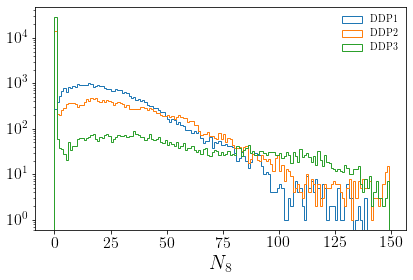

In [9]:
bins = np.arange(-1., 150., 1.)
 
_ = pl.hist(gama_d8['DDP1_N8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_N8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_N8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$N_8$')
pl.yscale('log')
pl.legend(frameon=False)

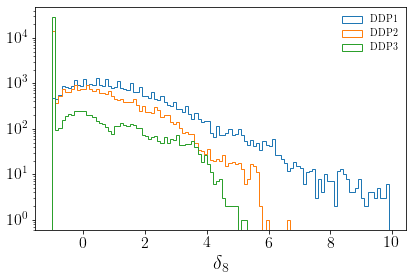

In [10]:
bins = np.arange(-1., 10., 0.1)

_ = pl.hist(gama_d8['DDP1_DELTA8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_DELTA8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_DELTA8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$\delta_8$')
pl.yscale('log')
pl.legend(frameon=False)

In [11]:
gama_d8.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

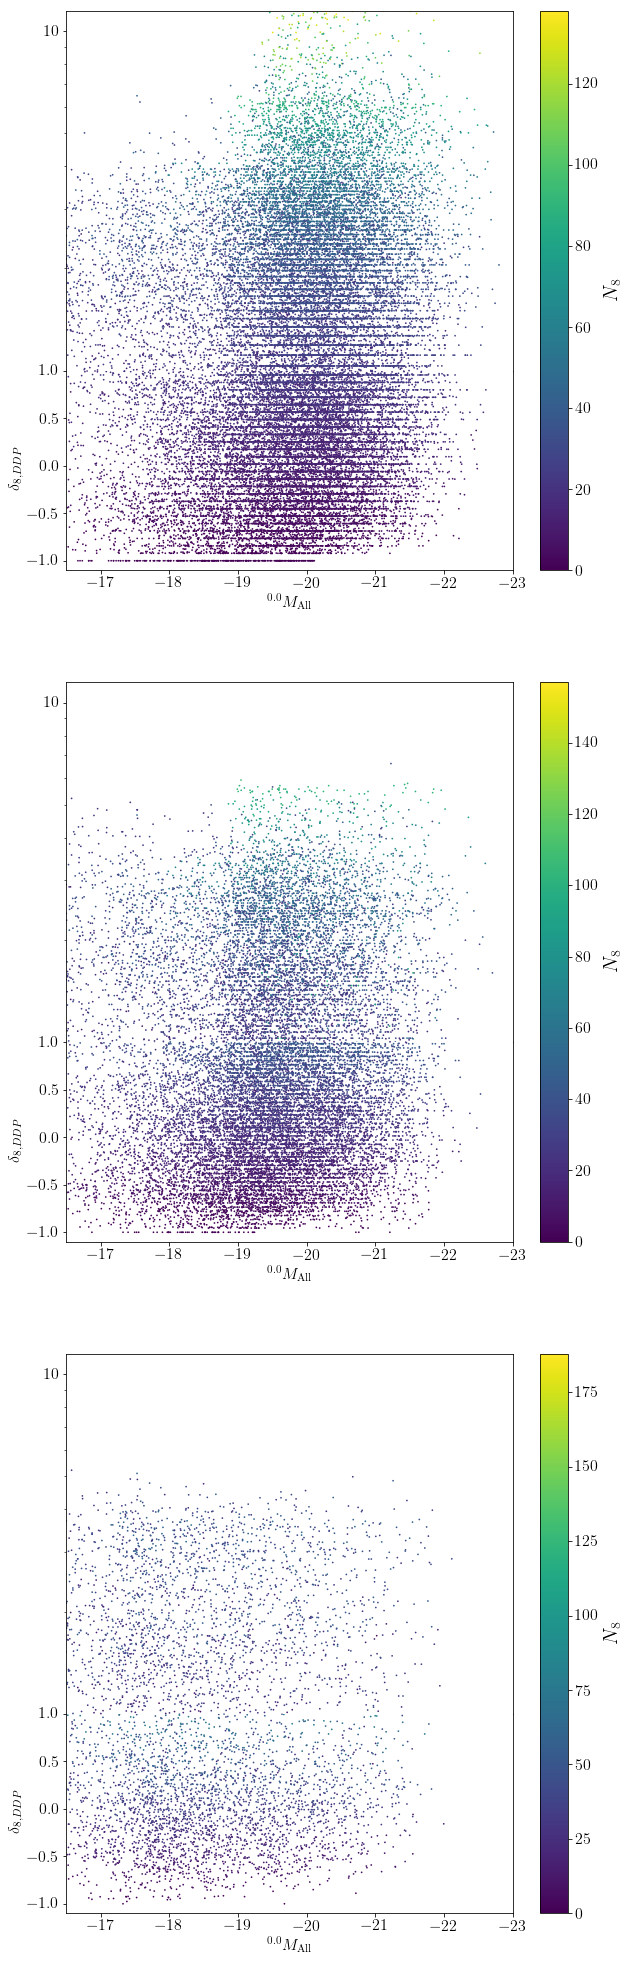

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(10, 35))

for idx, ax in enumerate(axes):
    ddp_num = idx + 1

    isin  = (gama_d8['ZGAMA'] <= gama_d8.meta['DDP{}_ZMAX'.format(ddp_num)])
    isin &= (gama_d8['ZGAMA'] >= gama_d8.meta['DDP{}_ZMIN'.format(ddp_num)])
    
    sc = ax.scatter(gama_d8['MALL_0P0'][isin],\
                    gama_d8['DDP{}_DELTA8'.format(ddp_num)][isin],\
                    c=gama_d8['DDP{}_N8'.format(ddp_num)][isin],\
                    marker='.',\
                    lw=0.0,\
                    s=12)

    ax.set_xlabel(r'$^{0.0}M_{\rm All}$', fontsize=16)
    ax.set_ylabel(r'$\delta_{8,DDP}$', fontsize=16)

    ax.set_xlim(-23., -16.)
    ax.set_ylim(-1.1, 1.)
    
    ax.spines['top'].set_visible(False)
    
    divider = make_axes_locatable(ax)
    
    axLog = divider.append_axes("top", size=5.0, pad=0, sharex=ax)
    axLog.set_yscale('log')
    axLog.set_xlim((-16.5, -23.))
    axLog.set_ylim((1., 11.5))
    axLog.scatter(gama_d8['MALL_0P0'], gama_d8['DDP{}_DELTA8'.format(ddp_num)], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    axLog.spines['bottom'].set_visible(False)
    axLog.xaxis.set_ticks_position('top')
    axLog.xaxis.set_visible(False)

    axLog.set_yticks([10.])
    axLog.set_yticklabels(['10'])
    
    ax.set_title('DDP{}'.format(idx+1))

    colorbar = fig.colorbar(sc, ax=ax, label=r'$N_8$')

In [13]:
realz  = 0
rpaths = [os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_ddp_n8_G{}_{:d}.fits'.format(ff, realz) for ff in [9, 12, 15]]

print('Reading: {}'.format(rpaths))

rand   = None

for rpath in rpaths:
    if not os.path.isfile(rpath):
        raise  RuntimeError('Expect random bound dist. file for {}; Run bound_dist.py for this field'.format(rpath))

    if rand == None:
        rand = Table.read(rpath)

    else:
        rand = vstack([rand, Table.read(rpath)])

Reading: ['/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G9_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G12_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G15_0.fits']


/cosma/home/durham/dc-wils7/.local/lib/python3.9/site-packages/astropy/table/table.py:3488: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


In [14]:
gama_d8.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

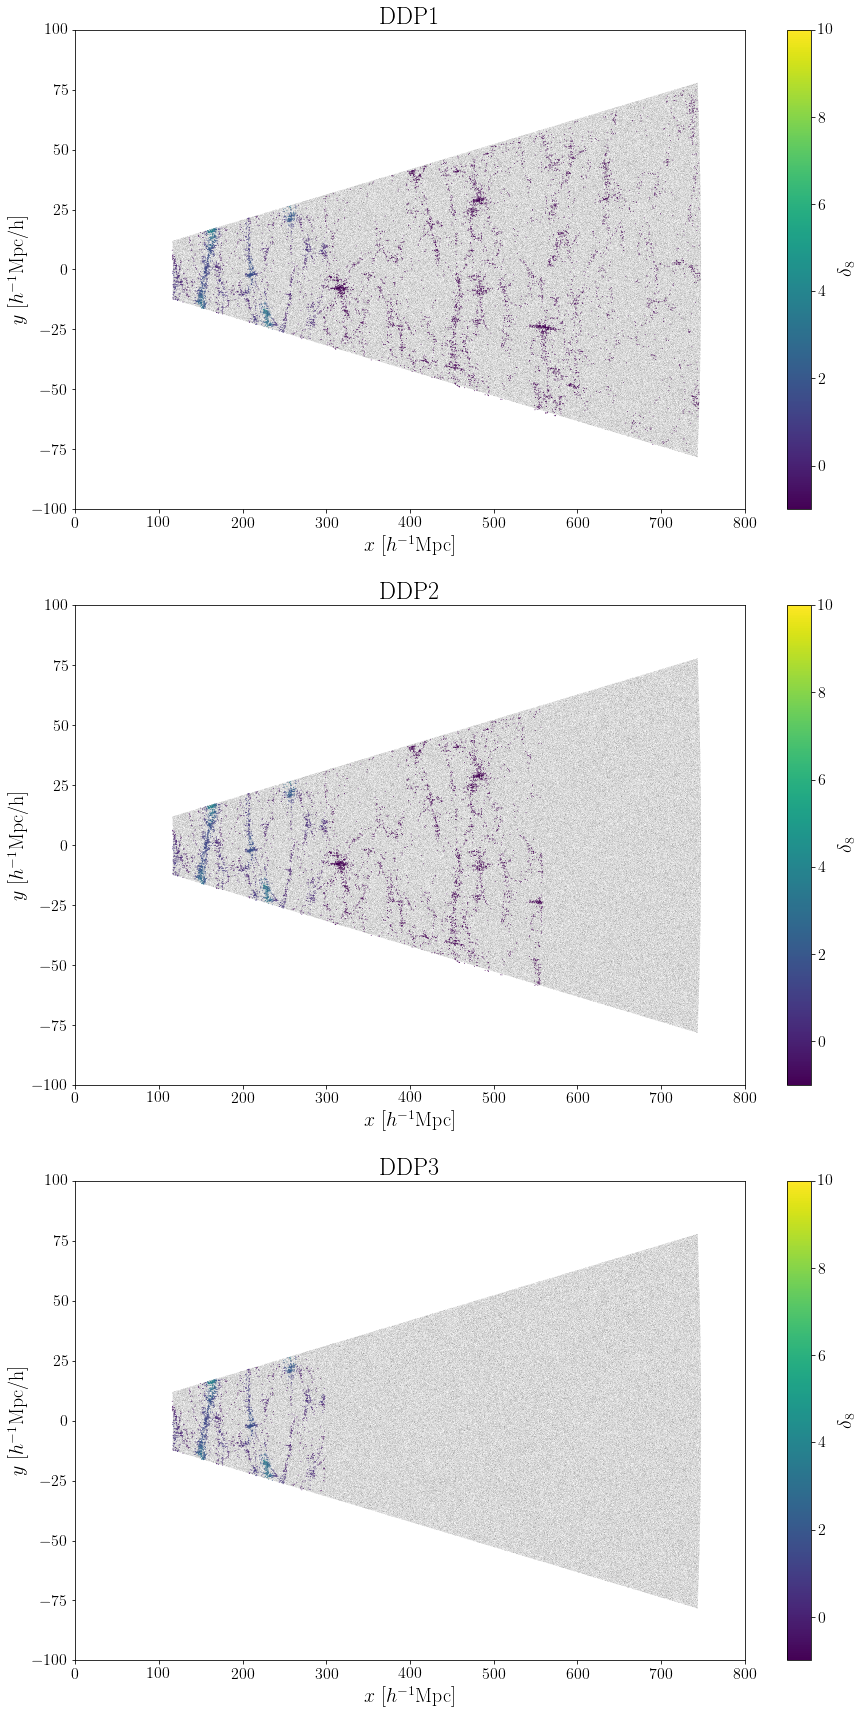

In [15]:
fig, axes     = plt.subplots(3, 1, figsize=(15, 30))

rand_d8       = rand[(rand['FIELD'] == field) & rand['IN_DDP1']]

gama_pos      = np.c_[gama_d8['CARTESIAN_X'], gama_d8['CARTESIAN_Y'], gama_d8['CARTESIAN_Z']]
gama_pos      = rotate(gama_d8['RA'], gama_d8['DEC'], gama_pos) 

rand_pos      = np.c_[rand_d8['CARTESIAN_X'], rand_d8['CARTESIAN_Y'], rand_d8['CARTESIAN_Z']]
rand_pos      = rotate(rand_d8['RANDOM_RA'], rand_d8['RANDOM_DEC'], rand_pos)

zs            = gama_d8['ZGAMA'].data[np.abs(gama_pos[:,2]) < 5.]
fills         = gama_d8['DDP{}_DELTA8'.format(idx+1)][np.abs(gama_pos[:,2]) < 5.]

gama_d8_slice = gama_pos[np.abs(gama_pos[:,2]) < 5.]
rand_d8_slice = rand_pos[np.abs(rand_pos[:,2]) < 5.]

for idx in range(3):
    sc = axes[idx].scatter(rand_d8_slice[:,0],\
                           rand_d8_slice[:,1],\
                           c='k',\
                           alpha=0.01,\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    is_ddp  = (zs <= gama_d8.meta['DDP{}_ZMAX'.format(idx+1)])
    is_ddp &= (zs >= gama_d8.meta['DDP{}_ZMIN'.format(idx+1)])
    
    sc = axes[idx].scatter(gama_d8_slice[is_ddp,0],\
                           gama_d8_slice[is_ddp,1],\
                           c=fills[is_ddp],\
                           alpha=1.,\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    axes[idx].set_ylim(100., -100.)
    
    colorbar = fig.colorbar(sc, ax=axes[idx], label=r'$\delta_8$')    
    
    axes[idx].set_xlim(0.0, 800.)
    axes[idx].set_ylim(-100., 100.)
    
    axes[idx].set_xlabel('$x$ [$h^{-1}$Mpc]')
    axes[idx].set_ylabel('$y$ [$h^{-1}$Mpc/h]')
    
    axes[idx].set_title('DDP{}'.format(idx+1))

In [16]:
tiers = delta8_tier(gama_d8['DDP1_DELTA8'])

In [17]:
np.unique(tiers, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([1282, 1352, 1371, 3883, 7177, 8083, 6697, 2542, 1973]))

In [18]:
realz  = 0
rpaths = [os.environ['HOME'] + '/data/GAMA4/randoms/randoms_G{}_{:d}.fits'.format(ff, realz) for ff in [9, 12, 15]]

print('Reading: {}'.format(rpaths))

rand   = None

for rpath in rpaths:
    if not os.path.isfile(rpath):
        raise  RuntimeError('Expect random bound dist. file for {}; Run bound_dist.py for this field'.format(rpath))

    if rand == None:
        rand = Table.read(rpath)

    else:
        rand = vstack([rand, Table.read(rpath)])

Reading: ['/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G9_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G12_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G15_0.fits']


In [19]:
DDP1_ZMIN = gama_d8.meta['DDP1_ZMIN']
DDP2_ZMAX = gama_d8.meta['DDP2_ZMAX']

gama_d8   = gama_d8[gama_d8['ZGAMA'] > DDP1_ZMIN]
gama_d8   = gama_d8[gama_d8['ZGAMA'] < DDP2_ZMAX]

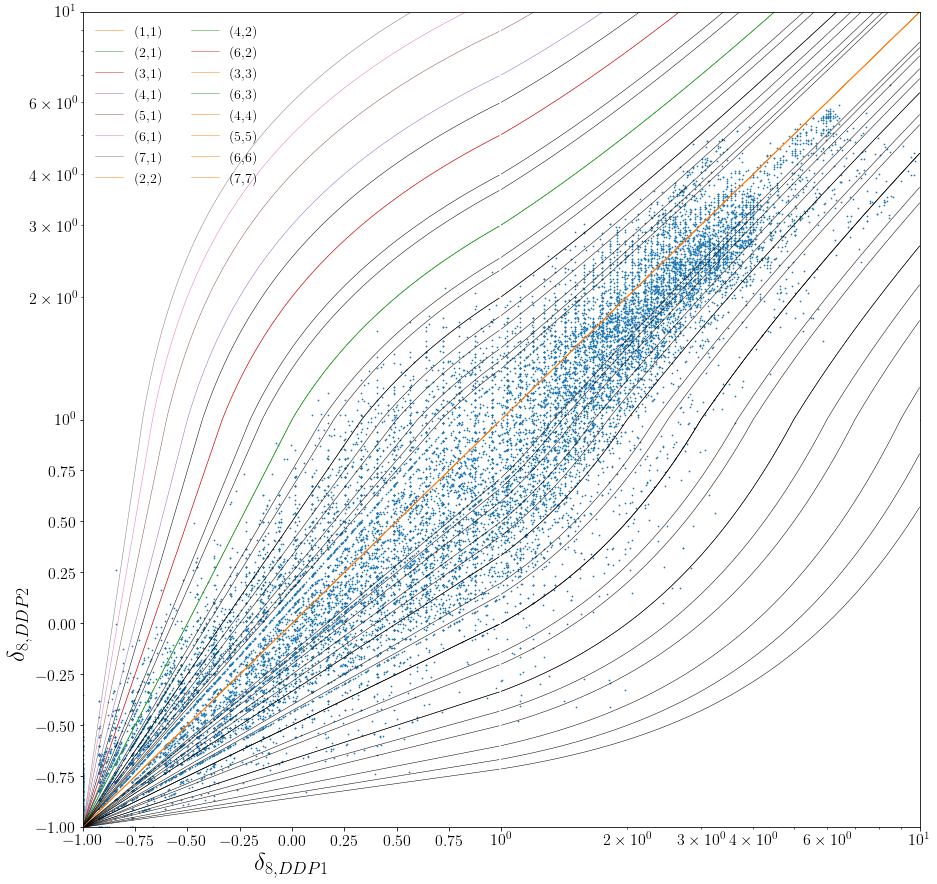

In [56]:
fig, axes = plt.subplots(2,2, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})

axes[0,0].set_xlim(-1., 1.)
axes[0,0].set_ylim(1., 10.)
axes[0,0].set_yscale('log')
axes[0,0].spines['right'].set_visible(False) 
axes[0,0].spines['bottom'].set_visible(False) 
axes[0,0].axes.get_xaxis().set_visible(False)

axes[1,0].set_xlim(-1., 1. - 1.e-8)
axes[1,0].set_ylim(-1., 1. - 1.e-8)
axes[1,0].set_xlabel(r'$\delta_{8, DDP1}$', fontsize=25)
axes[1,0].set_ylabel(r'$\delta_{8, DDP2}$', fontsize=25)
axes[1,0].spines['right'].set_visible(False) 
axes[1,0].spines['top'].set_visible(False) 

axes[0,1].set_xlim(1., 10.)
axes[0,1].set_ylim(1., 10)
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].spines['left'].set_visible(False) 
axes[0,1].spines['bottom'].set_visible(False) 
axes[0,1].axes.get_xaxis().set_visible(False)
axes[0,1].axes.get_yaxis().set_visible(False)

axes[1,1].set_xlim(1., 10.)
axes[1,1].set_ylim(-1., 1.)
axes[1,1].set_xscale('log')
axes[1,1].spines['left'].set_visible(False) 
axes[1,1].spines['top'].set_visible(False) 
axes[1,1].axes.get_yaxis().set_visible(False)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(2):
    for j in range(2):
        ax_xlims = axes[i,j].get_xlim()
        xs       = np.arange(ax_xlims[0], ax_xlims[1], 0.01)
        
        for n1 in np.arange(1, 8, 1):
            for n2 in np.arange(1, 8, 1):
                ys  = (n2 / n1) * (1. + xs)
                ys -= 1
                
                if (n2/n1).is_integer():
                    color = colors[int(n2/n1)]
                    label = '({},{})'.format(n2, n1)
                else:
                    color='k'
                    label=''
                    
                axes[i,j].plot(xs, ys, c=color, lw=0.5, alpha=1., label=label)
        
        sc = axes[i,j].scatter(gama_d8['DDP1_DELTA8'],\
                               gama_d8['DDP2_DELTA8'],\
                               marker='.',\
                               lw=0.0,\
                               s=12)
        
axes[0,0].legend(frameon=False, loc=2, fontsize=14, ncol=2)

# Done.